In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from src.plotData import plotData
from src.cellData import cellData
from src.cellExtractOCV import cellExtractOCV
from src.cellSim import cellSim

In [3]:
def main():
    """define cell filename"""
    pathname = (
        "datasets/lg-18650hg2/LG_HG2_Original_Dataset_McMasterUniversity_Jan_2020/"
    )
    temp = "25degC/"
    filenames = [
        filename
        for filename in os.listdir(pathname + temp)
        if filename.endswith(".csv")
    ]
    d = pd.DataFrame(filenames)
    d.to_csv("filenames.csv", header=None, index=False)
    filename = temp + "549_C20DisCh.csv"

    """extract from dataset"""
    cellDataObj = cellData(filename, pathname)
    plotDataObj = plotData()

    cellDataObj.extractData()

    # plotDataObj.plotDataFromDataset(cellDataObj)

    """extract and save OCV functions"""
    cellExtractOCVObj = cellExtractOCV(cellDataObj)

    cellExtractOCVObj.runOCV()

    # plotDataObj.plotComputedOCV(cellExtractOCVObj)

    """extract and save dynamic functions"""
    # filename = temp + "551_Mixed1.csv"
    filename = temp + "552_Mixed3.csv"
    cellDataObj = cellData(filename, pathname)

    cellDataObj.extractData()

    cellSimObj = cellSim(cellDataObj)

    cellSimObj.runSimLoad()

    # plotDataObj.plotLoadedOCV(cellSimObj)
    plotDataObj.plotDynamic(cellSimObj)

    plt.show()

extract data done from 25degC/549_C20DisCh.csv
extract OCV done
compute OCV done
save OCV done
extract data done from 25degC/552_Mixed3.csv
load OCV done
extract dynamic done
started parameter extraction via optimization


C:\Users\raghu\anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


R0 =  0.019243505015930657
R1 =  0.014720914346896683
R2 =  0.5
C1 =  1223.9624585455538
C2 =  83510.84189392182
RMS error =  19.17390737706276


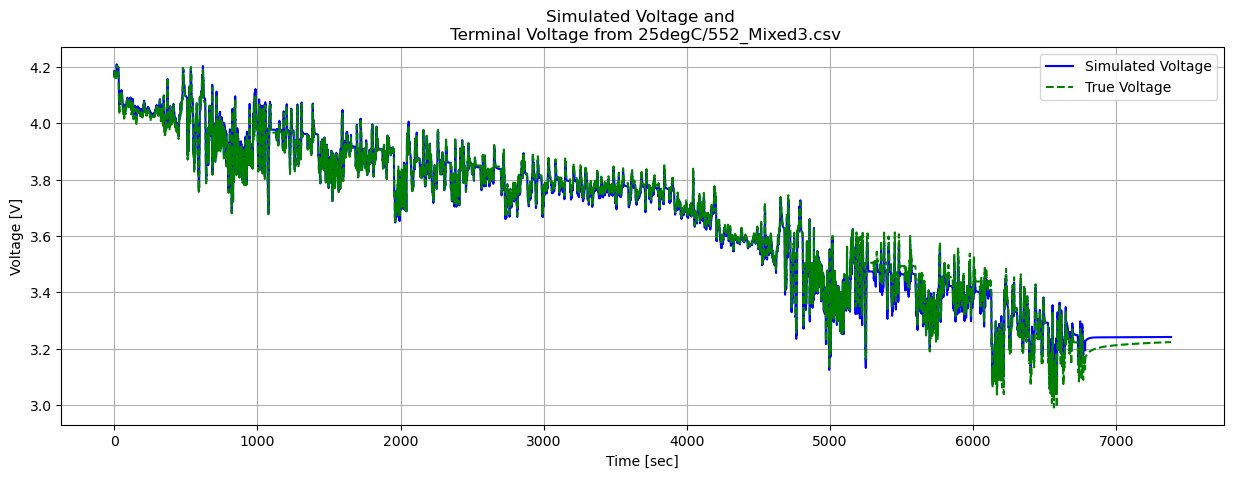

In [4]:
if __name__ == "__main__":
    main()